In [1]:
import os
import requests  #to query the API 
import re  #regular expressions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
## For text vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
## For word clouds
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Clustering 
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation 

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
####################################
## Step 1: Connect to the server Send a query Collect and clean the results
####################################

####################################################
##In the following loop, we will query thenewsapi servers for all the topic names in the list, We will then 
##build a large csv file where each article is a row From there, we will convert this data into a labeled dataframe 
####################################################

##let's build the csv file first, add the column names and  save the headlines
filename="main_data.csv"
# filename="bbc_data.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="LABEL,Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

### API Data Pull - Data Creation

In [3]:
################# enter for loop to collect
################# data on three topics
#######################################

topics=["US Elections", "Trump", "Biden", "Democracy","Republic", "Politics", "United States"]

endpoint="https://newsapi.org/v2/everything"

for topic in topics:

    ## Dictionary Structure
    URLPost = {'apiKey':'c922600c4df848998cdbd5199747ffd8',
               'q':topic,
#                'sources':'bbc-news',
               'sortBy':'relevancy'
               
    }
    print(URLPost, "\n")
    response=requests.get(endpoint, URLPost)
    print(response, "\n")
    jsontxt = response.json()
    print(jsontxt, "\n")
    #####################################################
    
    
    ## Open the file for append
    MyFILE=open(filename, "a")
    LABEL=topic
    for items in jsontxt["articles"]:
        print(items, "\n\n\n")
        Source=items["source"]["name"]
        print(Source)
        
        Date=items["publishedAt"]
        ##clean up the date
        NewDate=Date.split("T")
        Date=NewDate[0]
        print(Date)
        
        ## CLEAN the Title
        ##----------------------------------------------------------
        ##Replace punctuation with space
        # Accept one or more copies of punctuation         
        # plus zero or more copies of a space
        # and replace it with a single space
        Title=items["title"]
        Title=str(Title)
        #print(Title)
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)
        
        # and replace it with a single space
        ## NOTE: Using the "^" on the inside of the [] means
        ## we want to look for any chars NOT a-z or A-Z and replace
        ## them with blank. This removes chars that should not be there.
        Title=re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        Title=re.sub("\n|\r", "", Title)
        print(Title)
        ##----------------------------------------------------------
        
        Headline=items["description"]
        Headline=str(Headline)
        Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        ## Be sure there are no commas in the headlines or it will
        ## write poorly to a csv file....
        Headline=Headline.replace(',', '')
        Headline=' '.join(Headline.split())
        Headline=re.sub("\n|\r", "", Headline)
        
        ### AS AN OPTION - remove words of a given length............
        Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    
        #print("Author: ", Author, "\n")
        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Headline, "\n\n")
        
        #print(Author)
        print(Title)
        print(Headline)
        
        WriteThis=str(LABEL)+","+str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
        print(WriteThis)
        
        MyFILE.write(WriteThis)
        
    ## CLOSE THE FILE
    MyFILE.close()
    
################## END for loop



{'apiKey': 'c922600c4df848998cdbd5199747ffd8', 'q': 'US Elections', 'sortBy': 'relevancy'} 

<Response [200]> 

{'status': 'ok', 'totalResults': 5718, 'articles': [{'source': {'id': None, 'name': 'ReadWrite'}, 'author': 'Ali Rees', 'title': 'Anthropic introduces Prompt Shield ahead of US elections', 'description': 'Anthropic, a safety-first artificial intelligence (AI) company partially owned by Amazon, has announced a new precaution ahead of the US […]\nThe post Anthropic introduces Prompt Shield ahead of US elections appeared first on ReadWrite.', 'url': 'https://readwrite.com/anthropic-introduces-prompt-shield-ahead-of-elections/', 'urlToImage': 'https://readwrite.com/wp-content/uploads/2024/02/download-33-scaled.jpeg', 'publishedAt': '2024-02-16T15:05:13Z', 'content': 'Anthropic, a safety-first artificial intelligence (AI) company partially owned by Amazon, has announced a new precaution ahead of the US elections in 2024. First reported in TechCrunch, the company i… [+2269 chars]'}

In [4]:
## Need to import some code related to cleaning
filename="main_data.csv"
## Read to DF
df = pd.read_csv(filename)

## REMOVE any rows with NaN in them
df = df.dropna()
print(df["Headline"])
print(df.shape)

### Tokenize and Vectorize the Headlines
## Create the list of headlines
## Keep the labels!
HeadlineLIST=[]
LabelLIST=[]

for nexthead, nextlabel in zip(df["Headline"], df["LABEL"]):
    HeadlineLIST.append(nexthead)
    LabelLIST.append(nextlabel)

print("\n The headline list is:\n")
print(HeadlineLIST)

print("\n The label list is:\n")
print(LabelLIST)    

0      Anthropic safety first artificial intelligence...
1      Santos York district spotlight this special el...
2      coalition tech companies signed agreement Frid...
3      Independent candidates backed jailed Imran Kha...
4      accused overlooking propaganda flagged Meta cr...
                             ...                        
695    Action been taken group cross party lawmakers ...
696    More than half added grid capacity solar energ...
697    remarks Tuesday night former President Donald ...
698    There thousands McDonald locations there still...
699    After killed commander Iran backed militia Bag...
Name: Headline, Length: 698, dtype: object
(698, 5)

 The headline list is:

['Anthropic safety first artificial intelligence company partially owned Amazon announced precaution ahead post Anthropic introduces Prompt Shield ahead elections appeared first ReadWrite', 'Santos York district spotlight this special election centred policy', 'coalition tech companies signed ag

In [5]:
##########################################
## Remove all words that match the topics.
## For example, if the topics are food and covid
## remove these exact words.
##
## We will need to do this by hand. 

topics=["US Elections", "Trump", "Biden", "Democracy","Republic", "Politics", "United States"]
NewHeadlineLIST=[]

for element in HeadlineLIST:
    # print(element)
    # print(type(element))
    ## make into list
    AllWords=element.split(" ")
    # print(AllWords)
    
    ## Now remove words that are in your topics
    NewWordsList=[]
    for word in AllWords:
        # print(word)
        word=word.lower()
        if word in topics:
            print(word)
        else:
            NewWordsList.append(word)
            
    ##turn back to string
    NewWords=" ".join(NewWordsList)
    ## Place into NewHeadlineLIST
    NewHeadlineLIST.append(NewWords)

## Set the HeadlineLIST to the new one
HeadlineLIST=NewHeadlineLIST
print(HeadlineLIST) 

['anthropic safety first artificial intelligence company partially owned amazon announced precaution ahead post anthropic introduces prompt shield ahead elections appeared first readwrite', 'santos york district spotlight this special election centred policy', 'coalition tech companies signed agreement friday help prevent deepfakes critical elections taking place more than countries openai google meta amazon adobe among businesses joining pact prevent', 'independent candidates backed jailed imran khan have most seats party', 'accused overlooking propaganda flagged meta criminal prosecutors', 'biden campaign tiktok account rocky start they stressing comments', 'presidential elections personality contests', 'meta removed several facebook accounts that posed military families fake accounts facebook instagram were post meta takes down chinese facebook account posing military families appeared first readwrite', 'more than half added grid capacity solar energy large part thanks inflation red

## Lemmatization & Count Vectorization

In [54]:
# Initialize NLTK lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization
lemmatized_text = [' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]) for sentence in HeadlineLIST]

# Initialize CountVectorizer lemmatized
my_count_vectorizer_lemmatized = CountVectorizer(input="content", lowercase=True, stop_words = "english")

# Convert text data to matrices of token counts using CountVectorizer- 
## ref : MyDTM
count_matrix_lemmatized = my_count_vectorizer_lemmatized.fit_transform(lemmatized_text)  # create a sparse matrix
print("Type of CV matrix (lemmatized):",type(count_matrix_lemmatized))

# #vocab is a vocabulary list
# vocab_lemmatized_cv = my_count_vectorizer_lemmatized.get_feature_names_out()  # change to a list
# print("Vocabulary list (lemmatized):", list(vocab_lemmatized_cv)[0:20])

# Convert the sparse matrix to a regular array
count_matrix_lemmatized = count_matrix_lemmatized.toarray()  # convert to a regular array
print(type(count_matrix_lemmatized))

# Get column names
ColumnNames_lemmatized=my_count_vectorizer_lemmatized.get_feature_names_out()
# Convert NumPy array to pandas DataFrame
ColumnNames_lemmatized_df = pd.DataFrame(ColumnNames_lemmatized)

# Save DataFrame to CSV file
# ColumnNames_lemmatized_df.to_csv('ColumnNames_lemmatized_df.csv', index=False)
# Create a DataFrame from the CountVectorizer output
## MyDTM_DF
df_lemmatized=pd.DataFrame(count_matrix_lemmatized,columns=ColumnNames_lemmatized)
print(df_lemmatized)

df_lemmatized.to_csv('df_lemmatized.csv', index=False)

from pandas import DataFrame
## Convert the labels from list to df
Labels_DF = DataFrame(LabelLIST,columns=['LABEL'])

## Check your new DF and you new Labels df:
print("Labels\n")
print(Labels_DF)
print("lemmatized df \n")
print(df_lemmatized.iloc[:,0:6])

##Save original DF - without the lables
Orig_DF=df_lemmatized
print(Orig_DF)
######################
## AND - just to make sure our dataframe is fair
## let's remove columns called:
## food, bitcoin, and sports (as these are label names)
######################
#MyDTM_DF=MyDTM_DF.drop(topics, axis=1)


## Now - let's create a complete and labeled
## dataframe:
dfs = [Labels_DF, df_lemmatized]
print(dfs)

final_labeled_df = pd.concat(dfs,axis=1, join='inner')
## DF with labels
print(final_labeled_df)

final_labeled_df.to_csv('final_labeled_df.csv', index=False)

Type of CV matrix (lemmatized): <class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
     aaron  aaryn  abandonment  abbot  abdullah  abierto  ability  able  \
0        0      0            0      0         0        0        0     0   
1        0      0            0      0         0        0        0     0   
2        0      0            0      0         0        0        0     0   
3        0      0            0      0         0        0        0     0   
4        0      0            0      0         0        0        0     0   
..     ...    ...          ...    ...       ...      ...      ...   ...   
693      0      0            0      0         0        0        0     0   
694      0      0            0      0         0        0        0     0   
695      0      0            0      0         0        0        0     0   
696      0      0            0      0         0        0        0     0   
697      0      0            0      0         0        0        0     0   

     

## Word Cloud

[<wordcloud.wordcloud.WordCloud object at 0x7f9202008b20>, <wordcloud.wordcloud.WordCloud object at 0x7f91e005b970>, <wordcloud.wordcloud.WordCloud object at 0x7f9204fdfd90>, <wordcloud.wordcloud.WordCloud object at 0x7f9204fdf610>, <wordcloud.wordcloud.WordCloud object at 0x7f9204fdfac0>, <wordcloud.wordcloud.WordCloud object at 0x7f9204fdf580>, <wordcloud.wordcloud.WordCloud object at 0x7f9204fdfa60>]


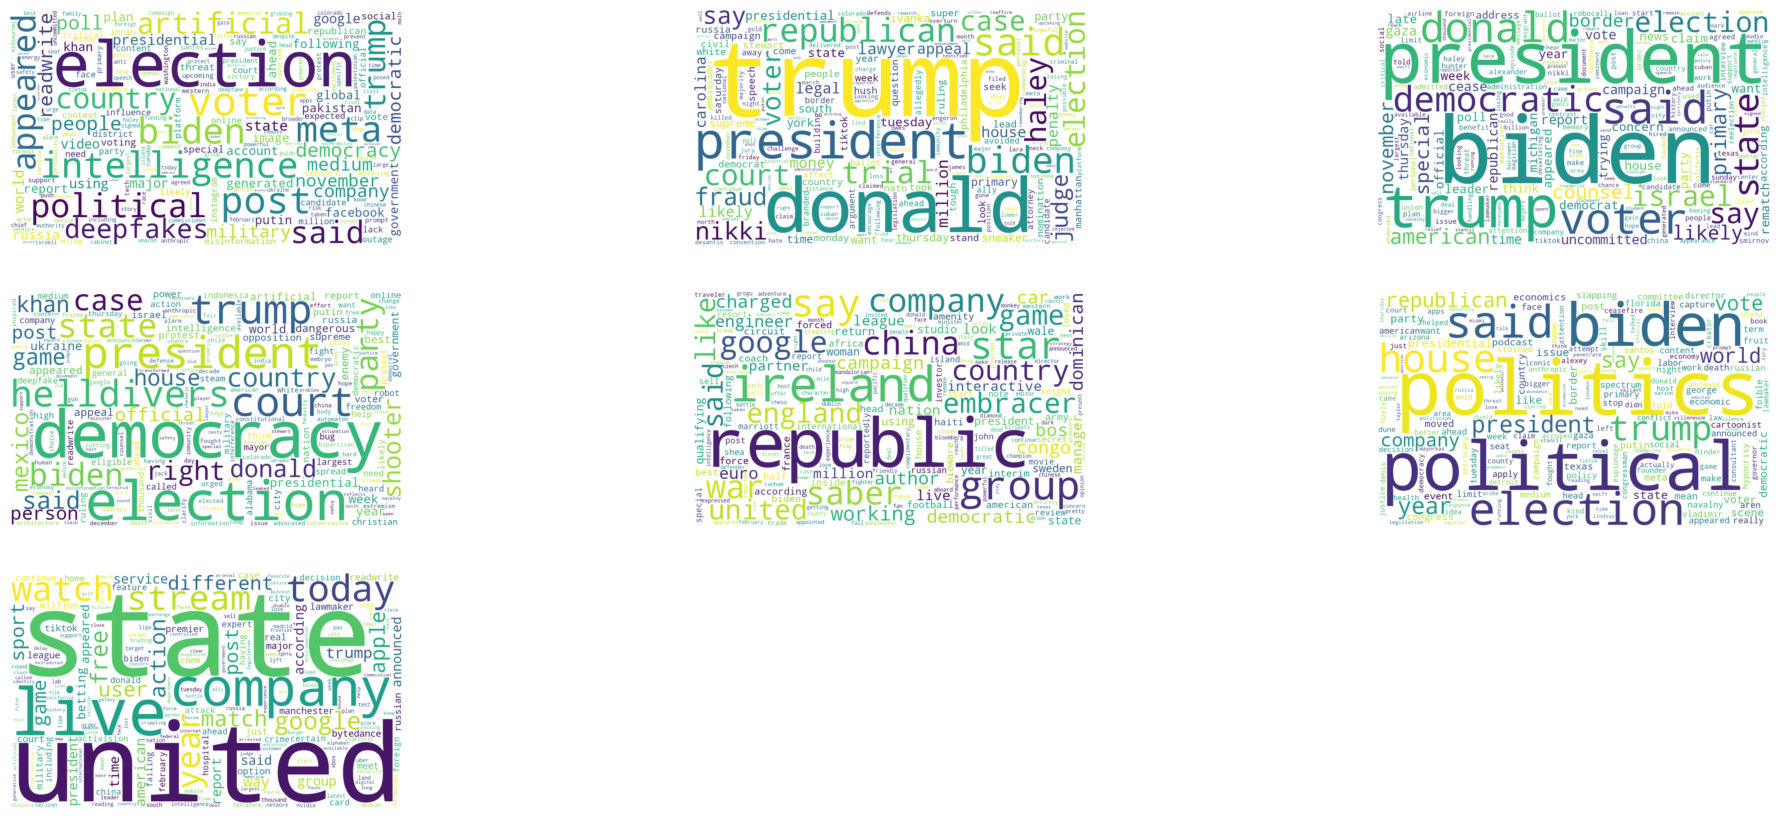

In [7]:
## Before we start our modeling, let's visualize and xplore.

##It might be very interesting to see the word clouds for each  of the topics. 
##--------------------------------------------------------

List_of_WC=[]

for mytopic in topics:

    tempdf = final_labeled_df[final_labeled_df['LABEL'] == mytopic]
    # print(tempdf)
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    #print(tempdf)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))
    #print( NextVarName)
    
    ##In the same folder as this code, I have three images
    ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
    #next_image=str(str(mytopic) + ".jpg")
    #print(next_image)
    
    ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
    
    ###########
    ## Create and store in a list the wordcloud OBJECTS
    #########
    
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, font_path=None,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)
    

##------------------------------------------------------------------
print(List_of_WC)
##########
########## Create the wordclouds
##########
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=len(topics)
for i in range(NumTopics):
    ax = fig.add_subplot(NumTopics,3,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")
 


## Latent Dirichlet Allocation (LDA)

In [8]:
##############################################
##
##   LDA Topics Modeling
##
##
#########################################################
NumTopics=len(topics)
NUM_TOPICS=NumTopics
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10000, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
   
lda_Z_DF = lda_model.fit_transform(df_lemmatized)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=15):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])

print("LDA Model:")
print_topics(lda_model, my_count_vectorizer_lemmatized)

(698, 7)
LDA Model:
Topic 0:
[('election', 12.270171956853826), ('ahead', 10.52377177441492), ('biden', 10.298090036698737), ('russian', 9.611816752144897), ('republic', 8.328080881952562), ('intelligence', 7.4200467861593316), ('movie', 6.696138710920193), ('appeared', 6.694731527894575), ('star', 6.506900897184744), ('republican', 6.372042298702294), ('say', 6.29801062682317), ('company', 6.2848196793139754), ('announced', 5.7868488846158455), ('post', 5.786169886845209), ('readwrite', 5.786035734243229)]
Topic 1:
[('trump', 17.91898340492694), ('said', 10.476465128509787), ('party', 9.991219445274247), ('sneaker', 9.607819939317682), ('look', 8.502027957491222), ('close', 5.9753631219059145), ('philadelphia', 5.783268641828591), ('secretary', 5.7828248333668055), ('senate', 5.594888700856448), ('republic', 5.4106058228546425), ('effort', 4.876631534395979), ('saturday', 4.8762958590061185), ('fine', 4.874216194951387), ('island', 4.6866230766983215), ('donald', 4.540329614941314)]
T

In [9]:
# conda install -c conda-forge pyldavis

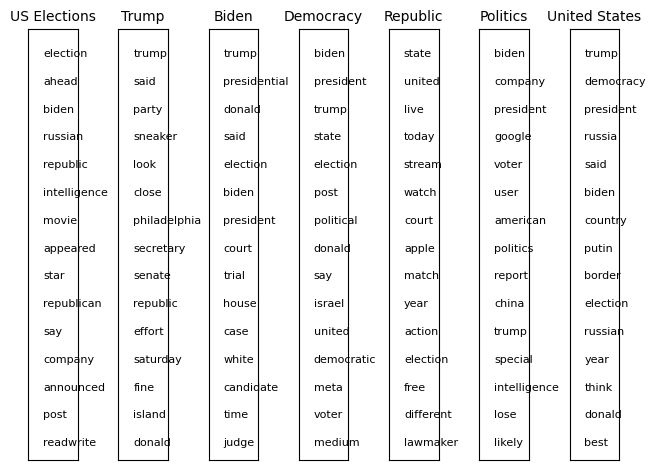

In [42]:
################ Another fun vis for LDA

word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(ColumnNames_lemmatized)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 8
topics=["US Elections", "Trump", "Biden", "Democracy", "Republic", "Politics", "United States"]

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([])  # remove y-axis markings ('ticks')
    plt.title('{}'.format(topics[t]), fontsize = 10)  # Add topic name to the title
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()

In [45]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

data = {'text': HeadlineLIST}
df = pd.DataFrame(data)

# Tokenize the text
tokenized_text = [doc.split() for doc in df['text']]

# Create a dictionary and a corpus
dictionary = Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]
# print(corpus)

# Perform LDA for k=2, k=3, and k=4
for k in [2, 3, 4, 5, 6, 7]:
    lda_model = LdaModel(corpus, num_topics=k, id2word=dictionary)
    vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis_data, f'lda_k{k}.html')

# Display the visualizations
for k in [2, 3, 4, 5, 6, 7]:
    vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(vis_data)

/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 

## Clustering


[[ 0.00000000e+00  9.27831216e-01  8.77525513e-01 ...  9.47295372e-01
   1.00000000e+00  1.00000000e+00]
 [ 9.27831216e-01  2.22044605e-16  9.29289322e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 8.77525513e-01  9.29289322e-01 -2.22044605e-16 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 ...
 [ 9.47295372e-01  1.00000000e+00  1.00000000e+00 ...  2.22044605e-16
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
  -2.22044605e-16  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00 -2.22044605e-16]]
[[ 0.   0.9  0.9 ...  0.9  1.   1. ]
 [ 0.9  0.   0.9 ...  1.   1.   1. ]
 [ 0.9  0.9 -0.  ...  1.   1.   1. ]
 ...
 [ 0.9  1.   1.  ...  0.   1.   1. ]
 [ 1.   1.   1.  ...  1.  -0.   1. ]
 [ 1.   1.   1.  ...  1.   1.  -0. ]]
[[   0.          341.            0.            2.        ]
 [  90.          502.            0.            2.        ]
 [   4.          5

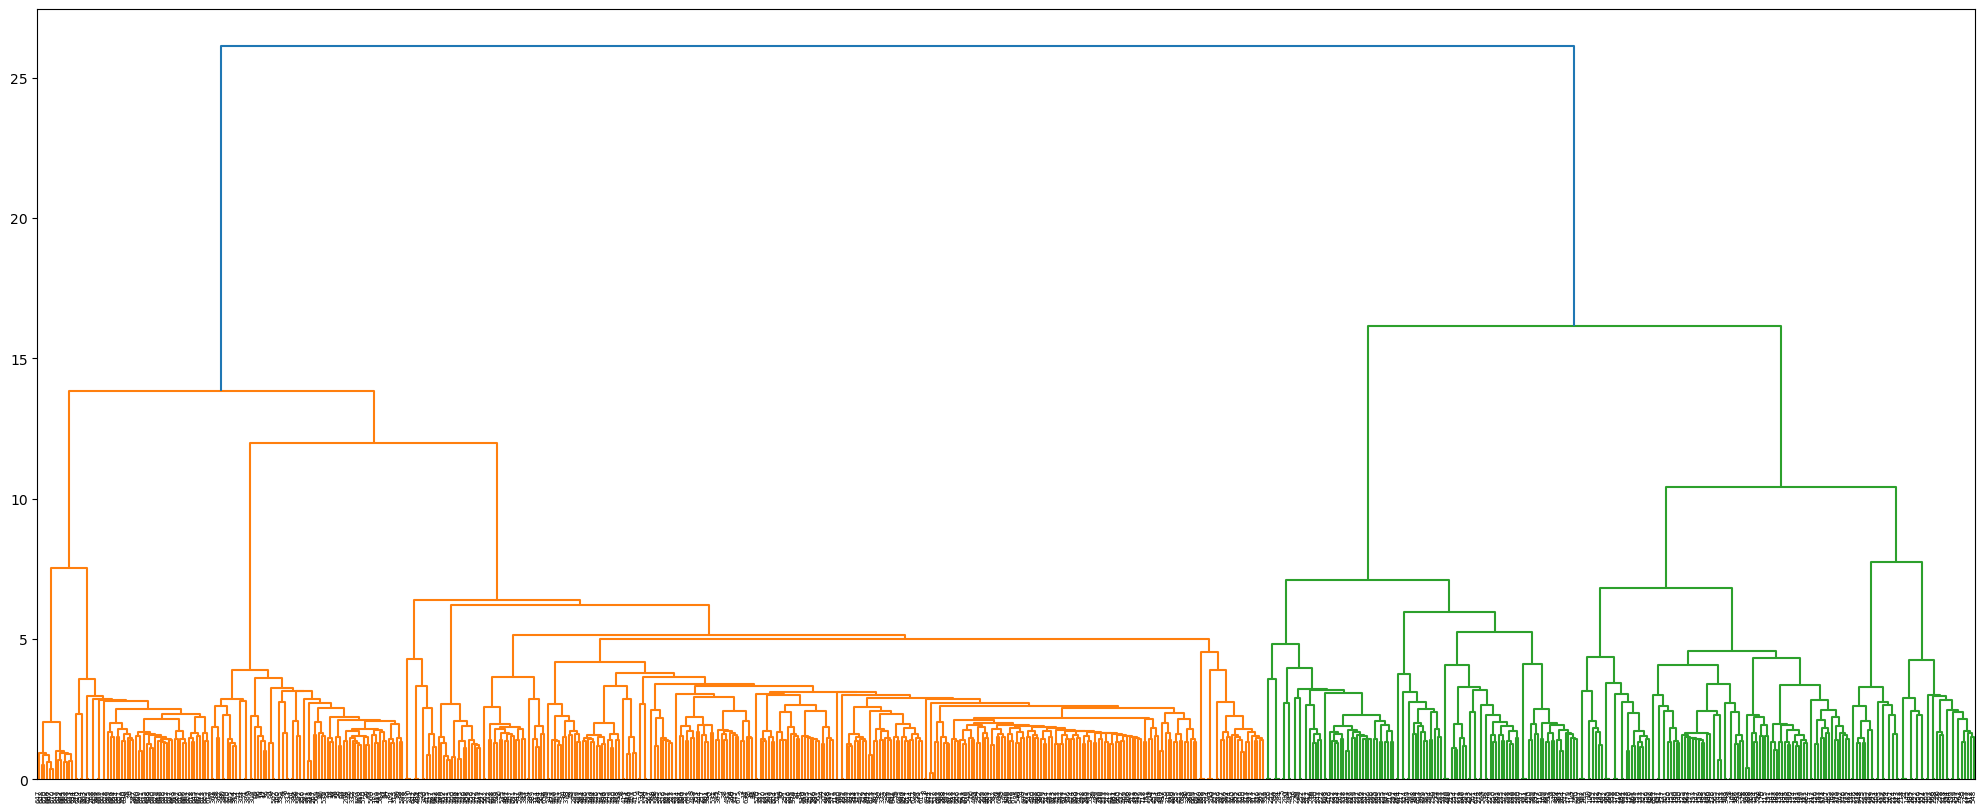

In [21]:
##### Hierarchial Clustering

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#length of the document: called cosine similarity
cosdist = 1 - cosine_similarity(count_matrix_lemmatized)
print(cosdist)
print(np.round(cosdist,1))  #cos dist should be .02

#----------------------------------------------------------
## Hierarchical Clustering using ward and cosine sim
linkage_matrix = ward(cosdist) #define the linkage_matrix 
#using ward clustering pre-computed distances
print(linkage_matrix)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix)
plt.show()

## Converting into Transaction data for performing ARM

In [46]:
# Convert the dataframe to transactional data
transactions = []
for _, row in final_labeled_df.iterrows():
    transaction_items = [col for col in final_labeled_df.columns if row[col] == 1]
    transactions.append(transaction_items)

print(transactions)

[['amazon', 'announced', 'appeared', 'artificial', 'company', 'election', 'intelligence', 'introduces', 'owned', 'partially', 'post', 'precaution', 'prompt', 'readwrite', 'safety', 'shield'], ['centred', 'district', 'election', 'policy', 'santos', 'special', 'spotlight', 'york'], ['adobe', 'agreement', 'amazon', 'business', 'coalition', 'company', 'country', 'critical', 'deepfakes', 'election', 'friday', 'google', 'help', 'joining', 'meta', 'openai', 'pact', 'place', 'signed', 'taking', 'tech'], ['backed', 'candidate', 'imran', 'independent', 'jailed', 'khan', 'party', 'seat'], ['accused', 'criminal', 'flagged', 'meta', 'overlooking', 'propaganda', 'prosecutor'], ['account', 'biden', 'campaign', 'comment', 'rocky', 'start', 'stressing', 'tiktok'], ['contest', 'election', 'personality', 'presidential'], ['appeared', 'chinese', 'fake', 'instagram', 'posed', 'posing', 'post', 'readwrite', 'removed'], ['added', 'capacity', 'energy', 'grid', 'half', 'incentive', 'inflation', 'large', 'reduc

In [47]:
# Convert transactions to DataFrame
df_transactions = pd.DataFrame(transactions)

# Save DataFrame to a CSV file
df_transactions.to_csv('transactions.csv', index=False)

# Read CSV file back into a DataFrame
df_read = pd.read_csv('transactions.csv')

print(df_read.head())

         0          1         2            3            4           5  \
0   amazon  announced  appeared   artificial      company    election   
1  centred   district  election       policy       santos     special   
2    adobe  agreement    amazon     business    coalition     company   
3   backed  candidate     imran  independent       jailed        khan   
4  accused   criminal   flagged         meta  overlooking  propaganda   

              6           7          8          9  ...      15    16     17  \
0  intelligence  introduces      owned  partially  ...  shield   NaN    NaN   
1     spotlight        york        NaN        NaN  ...     NaN   NaN    NaN   
2       country    critical  deepfakes   election  ...  openai  pact  place   
3         party        seat        NaN        NaN  ...     NaN   NaN    NaN   
4    prosecutor         NaN        NaN        NaN  ...     NaN   NaN    NaN   

       18      19    20   21   22   23   24  
0     NaN     NaN   NaN  NaN  NaN  NaN  